In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Trying to Understand the Data further 

In [2]:
df = pd.read_csv('preprocessed_dataset.csv')

In [3]:
df

,Unnamed: 0.1,Movie Title,Plot Summary,Cover Image,Year,Source,Rated,omdb Year,omdb Title,Released,...,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,BoxOffice,imdbID,ProcessedPlot
0,0.0,The Extreme Adventures of Super Dave,After the kind-hearted but clumsy Super Dave O...,NaN,2000,https://en.wikipedia.org//wiki/The_Extreme_Adv...,PG,2000,The Extreme Adventures of Super Dave,11 Jan 2000,...,"Super Dave Osborne, our accident-prone stuntma...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BNTk2ND...,"{'Source': 'Internet Movie Database', 'Value':...",5.1,NaN,tt0144096,kindhearted clumsy super dave osborne bob eins...
1,1.0,Next Friday,After finding out Deebo escaped prison to get ...,upload.wikimedia.org/wikipedia/en/e/e2/Next_Fr...,2000,https://en.wikipedia.org//wiki/Next_Friday,R,2000,Next Friday,12 Jan 2000,...,A streetwise man flees South Central Los Angel...,"English, Spanish",United States,2 nominations,https://m.media-amazon.com/images/M/MV5BZTg4NT...,"[{'Source': 'Internet Movie Database', 'Value'...",6.1,"$57,328,603",tt0195945,finding deebo escaped prison get revenge craig...
2,2.0,Play It to the Bone,Aging prizefighters and longtime best friends ...,upload.wikimedia.org/wikipedia/en/thumb/5/5d/P...,2000,https://en.wikipedia.org//wiki/Play_It_to_the_...,R,1999,Play It to the Bone,21 Jan 2000,...,Two best friends and former middleweight conte...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMTM2Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",5.5,"$8,434,146",tt0196857,aging prizefighter longtime best friend vince ...
3,3.0,Supernova (2000 film),Supernova chronicles the search-and-rescue pat...,upload.wikimedia.org/wikipedia/en/thumb/0/0a/S...,2000,https://en.wikipedia.org//wiki/Supernova_(2000...,PG-13,2000,Supernova,14 Jan 2000,...,A deep space rescue and recovery spaceship wit...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMzRjYT...,"[{'Source': 'Internet Movie Database', 'Value'...",4.8,"$14,230,455",tt0134983,supernova chronicle searchandrescue patrol med...
4,4.0,The Boondock Saints,"In Boston, Irish American fraternal twin broth...",upload.wikimedia.org/wikipedia/en/thumb/1/1b/T...,2000,https://en.wikipedia.org//wiki/The_Boondock_Sa...,R,1999,The Boondock Saints,21 Jan 2000,...,Two Irish Catholic brothers become vigilantes ...,"English, Spanish, Papiamento, Russian, Latin","United States, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNTliMT...,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,"$30,471",tt0144117,boston irish american fraternal twin brother c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,NaN,Memory (2023 film),"Sylvia, a single mother, social worker, and re...",upload.wikimedia.org/wikipedia/en/thumb/4/4e/M...,2023,https://en.wikipedia.org//wiki/Memory_(2023_film),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sylvia single mother social worker recovering ...
5552,NaN,The Color Purple (2023 film),"In 1909 Georgia, teenager Celie Harris lives w...",upload.wikimedia.org/wikipedia/en/thumb/7/70/C...,2023,https://en.wikipedia.org//wiki/The_Color_Purpl...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,georgia teenager celie harris life sister net...
5553,NaN,The Boys in the Boat (film),The film's plot centres on the University of W...,upload.wikimedia.org/wikipedia/en/thumb/6/63/B...,2023,https://en.wikipedia.org//wiki/The_Boys_in_the...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,film plot centre university washington crew re...
5554,NaN,Ferrari (2023 film),"In the summer of 1957, Italian entrepreneur En...",upload.wikimedia.org/wikipedia/en/thumb/f/f6/F...,2023,https://en.wikipedia.org//wiki/Ferrari_(2023_f...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,summer italian entrepreneur enzo ferrari prep...


In [4]:
df.dtypes

Unnamed: 0.1     float64
Movie Title       object
Plot Summary      object
Cover Image       object
Year               int64
Source            object
Rated             object
omdb Year         object
omdb Title        object
Released          object
Runtime           object
Genre             object
Director          object
Writer            object
Actors            object
Plot              object
Language          object
Country           object
Awards            object
Poster            object
Ratings           object
imdbRating       float64
BoxOffice         object
imdbID            object
ProcessedPlot     object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,837.0,112.793309,65.663518,0.0,55.0,113.0,170.0,236.0
Year,5556.0,2011.923866,6.947933,2000.0,2006.0,2012.0,2018.0,2023.0
imdbRating,807.0,6.264808,1.031177,1.9,5.6,6.3,7.0,9.0


In [6]:
# total percentage of nan values in the complete dataset
df.isnull().mean()*100

Unnamed: 0.1     84.935205
Movie Title       0.000000
Plot Summary      0.000000
Cover Image       0.485961
Year              0.000000
Source            0.000000
Rated            85.763139
omdb Year        85.313175
omdb Title       85.313175
Released         85.367171
Runtime          85.457163
Genre            85.331174
Director         85.655148
Writer           85.475162
Actors           85.385169
Plot             85.439165
Language         85.385169
Country          85.349172
Awards           87.167027
Poster           85.403168
Ratings          85.313175
imdbRating       85.475162
BoxOffice        87.059035
imdbID           85.313175
ProcessedPlot     0.000000
dtype: float64

This is mainly the data that has been fetched using the omdb api to get more details, this data turned out to be redundant

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Movie Title', 'Plot Summary', 'Cover Image', 'Year',
       'Source', 'Rated', 'omdb Year', 'omdb Title', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'imdbRating', 'BoxOffice', 'imdbID',
       'ProcessedPlot'],
      dtype='object')

In [8]:
# redundant
df[['omdb Year','Year','Released']].head(10)

,omdb Year,Year,Released
0,2000,2000,11 Jan 2000
1,2000,2000,12 Jan 2000
2,1999,2000,21 Jan 2000
3,2000,2000,14 Jan 2000
4,1999,2000,21 Jan 2000
5,2000,2000,21 Jan 2000
6,1999,2000,28 Jan 2000
7,1999,2000,04 Feb 2000
8,2000,2000,04 Feb 2000
9,2000,2000,04 Feb 2000


These columns are giving us the same information, can be considered to remove

In [9]:
# Year 
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [10]:
# unique languages used in the whole dataset

In [11]:
df['Language'].head()

0                                         English
1                                English, Spanish
2                                         English
3                                         English
4    English, Spanish, Papiamento, Russian, Latin
Name: Language, dtype: object

In [12]:
x = df['Language'].dropna()
all_lang = ', '.join(x)
unique_langs = [language.strip() for language in all_lang.split(',')]
len(set(unique_langs))

72

In [13]:
# number of unique directors we have in the whole dataset
x=df['Director'].dropna()
x = x.unique()
all_directors = ', '.join(x)
all_directors = [direct.strip() for direct in all_directors.split(',')]
len(set(all_directors))

712

In [14]:
# total Genres in the Dataset
x = df['Genre'].dropna()
x = x.unique()
all_generes = ', '.join(x)
all_generes=[genre.strip() for genre in all_generes.split(',')]
len(set(all_generes))

23

<AxesSubplot:>

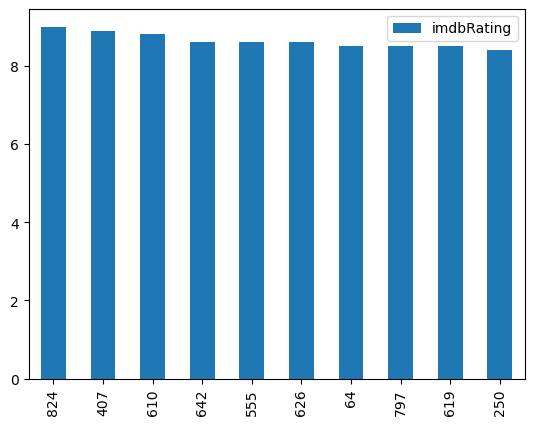

In [15]:
# top 10 movies with highest imdb ratings,their directors and the year of release.
df[['Movie Title','Year','Director','imdbRating']].sort_values(by='imdbRating',ascending=False)[:10].plot(kind='bar',y='imdbRating')

In [16]:
df[['Movie Title','Year','Director','imdbRating']].sort_values(by='imdbRating',ascending=False)[:10]

,Movie Title,Year,Director,imdbRating
824,The Lord of the Rings: The Return of the King,2003,Peter Jackson,9.0
407,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,8.9
610,The Lord of the Rings: The Two Towers,2002,Peter Jackson,8.8
642,Daredevil (film),2003,NaN,8.6
555,Spirited Away,2002,Hayao Miyazaki,8.6
626,City of God (2002 film),2003,"Fernando Meirelles, Kátia Lund",8.6
64,Gladiator (2000 film),2000,Ridley Scott,8.5
797,Alien (film),2003,Ridley Scott,8.5
619,The Pianist (2002 film),2002,Roman Polanski,8.5
250,Memento (film),2001,Christopher Nolan,8.4


In [17]:
df.columns

Index(['Unnamed: 0.1', 'Movie Title', 'Plot Summary', 'Cover Image', 'Year',
       'Source', 'Rated', 'omdb Year', 'omdb Title', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'imdbRating', 'BoxOffice', 'imdbID',
       'ProcessedPlot'],
      dtype='object')

In [18]:
# NLP ka EDA karna hai abhi teko and build corpus

# EDA on Textual Data (Movie Summary)

In [19]:
# basic statistics
df['length'] = df['Plot Summary'].str.len()

In [20]:
df['length'].describe()

count     5556.000000
mean      3406.812635
std       1313.911990
min         68.000000
25%       2837.750000
50%       3633.000000
75%       4115.000000
max      22275.000000
Name: length, dtype: float64

In [21]:
# word count
def word_count(text):
    text = str(text)
    text = text.split()
    return len(text)

In [22]:
df['word_count'] = df['Plot Summary'].apply(word_count)

In [23]:
df['word_count'].describe()

count    5556.000000
mean      581.070914
std       225.590607
min         9.000000
25%       487.000000
50%       620.000000
75%       696.000000
max      3764.000000
Name: word_count, dtype: float64

# Corpus Build

In [25]:
def corpus(text):
    text = str(text)
    text_l = text.split()
    return text_l

In [26]:
df['corp_list'] = df['ProcessedPlot'].apply(corpus)

In [27]:
df['corp_list'].head()

0    [kindhearted, clumsy, super, dave, osborne, bo...
1    [finding, deebo, escaped, prison, get, revenge...
2    [aging, prizefighter, longtime, best, friend, ...
3    [supernova, chronicle, searchandrescue, patrol...
4    [boston, irish, american, fraternal, twin, bro...
Name: corp_list, dtype: object

In [37]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0],ncols=150,nrows=10,colour='blue',smoothing=0.8):
    corpus+=df['corp_list'][i]
len(corpus)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5556/5556 [00:00<00:00, 31021.03it/s]


1808076

In [29]:
# most occuring words
from collections import Counter
common_words = Counter(corpus).most_common(10)
common_words

[('find', 8110),
 ('tell', 6361),
 ('one', 6290),
 ('take', 6056),
 ('go', 6008),
 ('back', 5539),
 ('get', 5277),
 ('father', 5275),
 ('friend', 5204),
 ('home', 5177)]

In [30]:
words = []
freq = []
for word, value in common_words:
    words.append(word)
    freq.append(value)

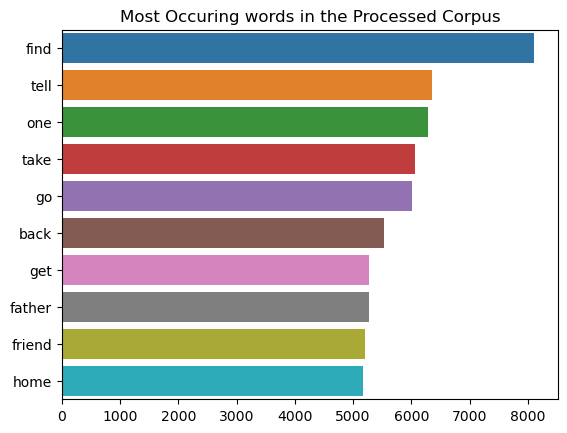

In [31]:
sns.barplot(x=freq,y=words)
plt.title('Most Occuring words in the Processed Corpus')
plt.show()

# Word Clouds

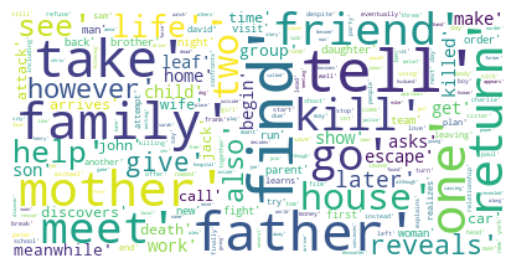

In [45]:
# Corpus Cloud
data = str(corpus)

# word cloud 
wc = WordCloud(max_font_size=50,background_color="white").generate(data)

# Displaying the image
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

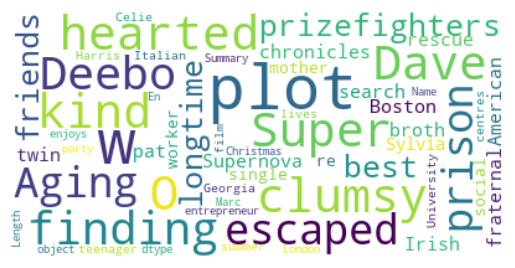

In [46]:
# Corpus Cloud
data = str(df['Plot Summary'])

# word cloud 
wc = WordCloud(max_font_size=50,background_color="white").generate(data)

# Displaying the image
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
